Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


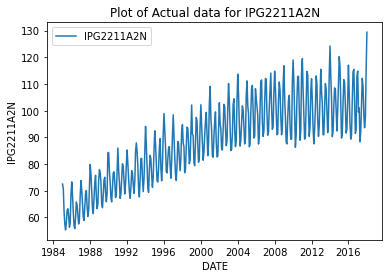

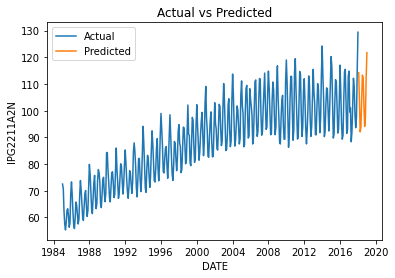

In [3]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import gradio as gr
import io
import warnings
warnings.simplefilter("ignore")


def predict_timeseries(data_file):
    # Load CSV file into a pandas DataFrame
    data = pd.read_csv(data_file.name, index_col=[0], parse_dates=True)

    # Convert date column to datetime object
    data.index = pd.to_datetime(data.index)

    # Fit the auto ARIMA model
    model = pm.auto_arima(data.values, seasonal=True, m=12)

    # Get ARIMA order
    arima_order = model.order

    # Plot the actual data
   # Plot the actual data
    fig_actual, ax_actual = plt.subplots()
    ax_actual.plot(data, label = data.columns[-1])
    ax_actual.set_xlabel(data.index.name)
    plt.legend()
    ax_actual.set_ylabel(data.columns[-1])
    ax_actual.set_title("Plot of Actual data for {}".format(data.columns[-1]))
    plt.show()
    
    # Get the last date in the actual data
    last_date = data.index[-1]

    # Make predictions
    predicted_values = model.predict(n_periods=12)

    # Generate a range of dates starting from the start date
    pred_index = pd.date_range(start=last_date, periods=len(predicted_values)+1, freq="MS")[1:]

    # Create a new dataframe with the predicted values and the generated dates
    predictions = pd.DataFrame({'predicted_values': predicted_values}, index=pred_index)
    predictions.columns = data.columns
    predictions.index.name = data.index.name
    predictions.index.freq = data.index.freq

    # Merge the dataframes using the index
    merged_data = pd.concat([data, predictions], axis=0)

    num_actual = len(data.index)

    # Plot the actual vs predicted data
    actual_data = merged_data.iloc[:num_actual,:]
    fig, ax = plt.subplots()
    ax.plot(actual_data.index, actual_data[data.columns[-1]], label='Actual')

    # Plot the predicted data
    predicted_data = merged_data.iloc[num_actual:,:]
    ax.plot(predicted_data.index, predicted_data[data.columns[-1]], label='Predicted')

    # Add x and y axis labels
    ax.set_xlabel(data.index.name)
    ax.set_ylabel(data.columns[-1])

    # Add title and legend
    ax.set_title('Actual vs Predicted')
    ax.legend()
    plt.show()


    return data.head(), fig_actual, arima_order, predictions, fig

input_data = gr.inputs.File(label="Upload CSV file")

outputs = [gr.outputs.Dataframe(type = "pandas", label = "FIRST FIVE ROWS OF DATASET"), 
                                'plot', 
                                gr.outputs.Textbox(label = "ARIMA ORDER"), 
                                gr.outputs.Dataframe(type = "pandas", label = "PREDICTIONS FOR NEXT 12 PERIODS"), 
                                'plot'
          ]
examples = ["Electric_Production.csv"]
interface = gr.Interface(fn=predict_timeseries, inputs=input_data, outputs=outputs,
                         title="Time series Forecast using AUTO ARIMA",
                         description="Upload a CSV file of monthly time series data to generate 12 period forecasts using ARIMA.\nPlease Note: \nThe first plot displays the Time Plot of the Actual Series \n\tThe second Plot displays Plot Of Actual  and Predicted values",
                         theme = "darkhuggingface", 
                         examples = examples)
interface.launch()

In [12]:
import warnings as warnings
print(warnings.__version__)

AttributeError: module 'warnings' has no attribute '__version__'